In [44]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
df = pd.read_csv('/content/sample_data/loans_full_schema.csv')

# x = df.loc[:, df.columns != 'interest_rate']
# y = df.loc[:,'interest_rate']
# print(df.describe())
# model = LinearRegression() 
# model.fit(x, y)
# r_sq = model.score(x, y)
# print('coefficient of determination:', r_sq)


In [45]:
from IPython.display import display
df = pd.read_csv('/content/sample_data/loans_full_schema.csv')

pd.options.display.max_columns = None
# display(df)

# --------------feature non_NA_values dropped_with_reason_or_n0t-------------------------------
# num_accounts_120d_past_due 9682 ******
# months_since_last_credit_inquiry 8729 *****
# months_since_90d_late	2285  drop colum because only 22% present
# months_since_last_delinq 4342 drop colum because only 43% present
# verification_income_joint 1455  drop colum because only 15% present
# annual_income_joint 1495 drop colum because only 15% present
#debt_to_income_joint drop column because only 15% present
# debt_to_income	9976 
# emp_length 9183
# emp_title 9167  drop colum because not correleated

df.drop(['months_since_90d_late','months_since_last_delinq', 'verification_income_joint','annual_income_joint'], axis=1, inplace = True)
debt_to_income_joint = df['debt_to_income']
debt_to_income = df['debt_to_income']
df.drop(['debt_to_income_joint'], axis=1, inplace=True)
df.dropna(subset = ["emp_title"], inplace=True)



# debt_to_income 9166
# months_since_last_credit_inquiry 8045
# num_accounts_120d_past_due 8872



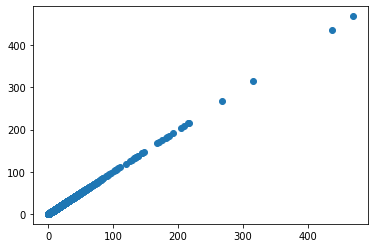

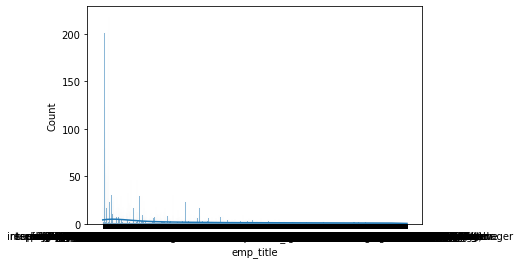

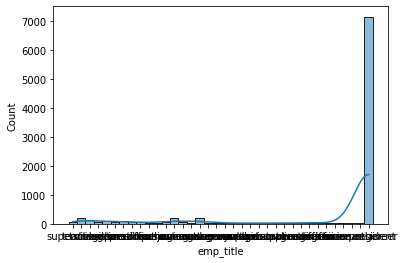

In [46]:
# not_null_emp_df = df[df['emp_title'].notnull()]
# df.groupby('emp_title')['annual_income'].mean()

import numpy as np
import matplotlib.pyplot as plt

#Checking how debt to income and debt to income joint are related so that we can fill missing debt to income.
y_train = debt_to_income
x_train = debt_to_income_joint

plt.scatter(x_train, y_train)
plt.show()
# linear regression = model(x,y)
value = 26.27 
#model.predict(x.[] such that y is na and emp_title )
#as of now replace value of debt to income by joint

df['debt_to_income'] = df['debt_to_income'].replace(np.nan, value)
df[['issue_months','issue_year']]=df.issue_month.str.split('-',expand=True)
df.drop(['issue_month'], axis=1, inplace = True)


import seaborn as sns
#verifying distribution of emp titles.
sns.histplot(df, x="emp_title", bins=20, kde=True)
plt.show()


#all less emp title which are less than 20 are all clubbed as 'others' 
greater_25= df.groupby(['emp_title']).filter(lambda x: len(x) >20) 
less_equal_25 = df.groupby(['emp_title']).filter(lambda x: len(x) <=20) 
less_equal_25['emp_title']='other'
df = greater_25.append(less_equal_25)

sns.histplot(df, x="emp_title", bins=20, kde=True)
plt.show()


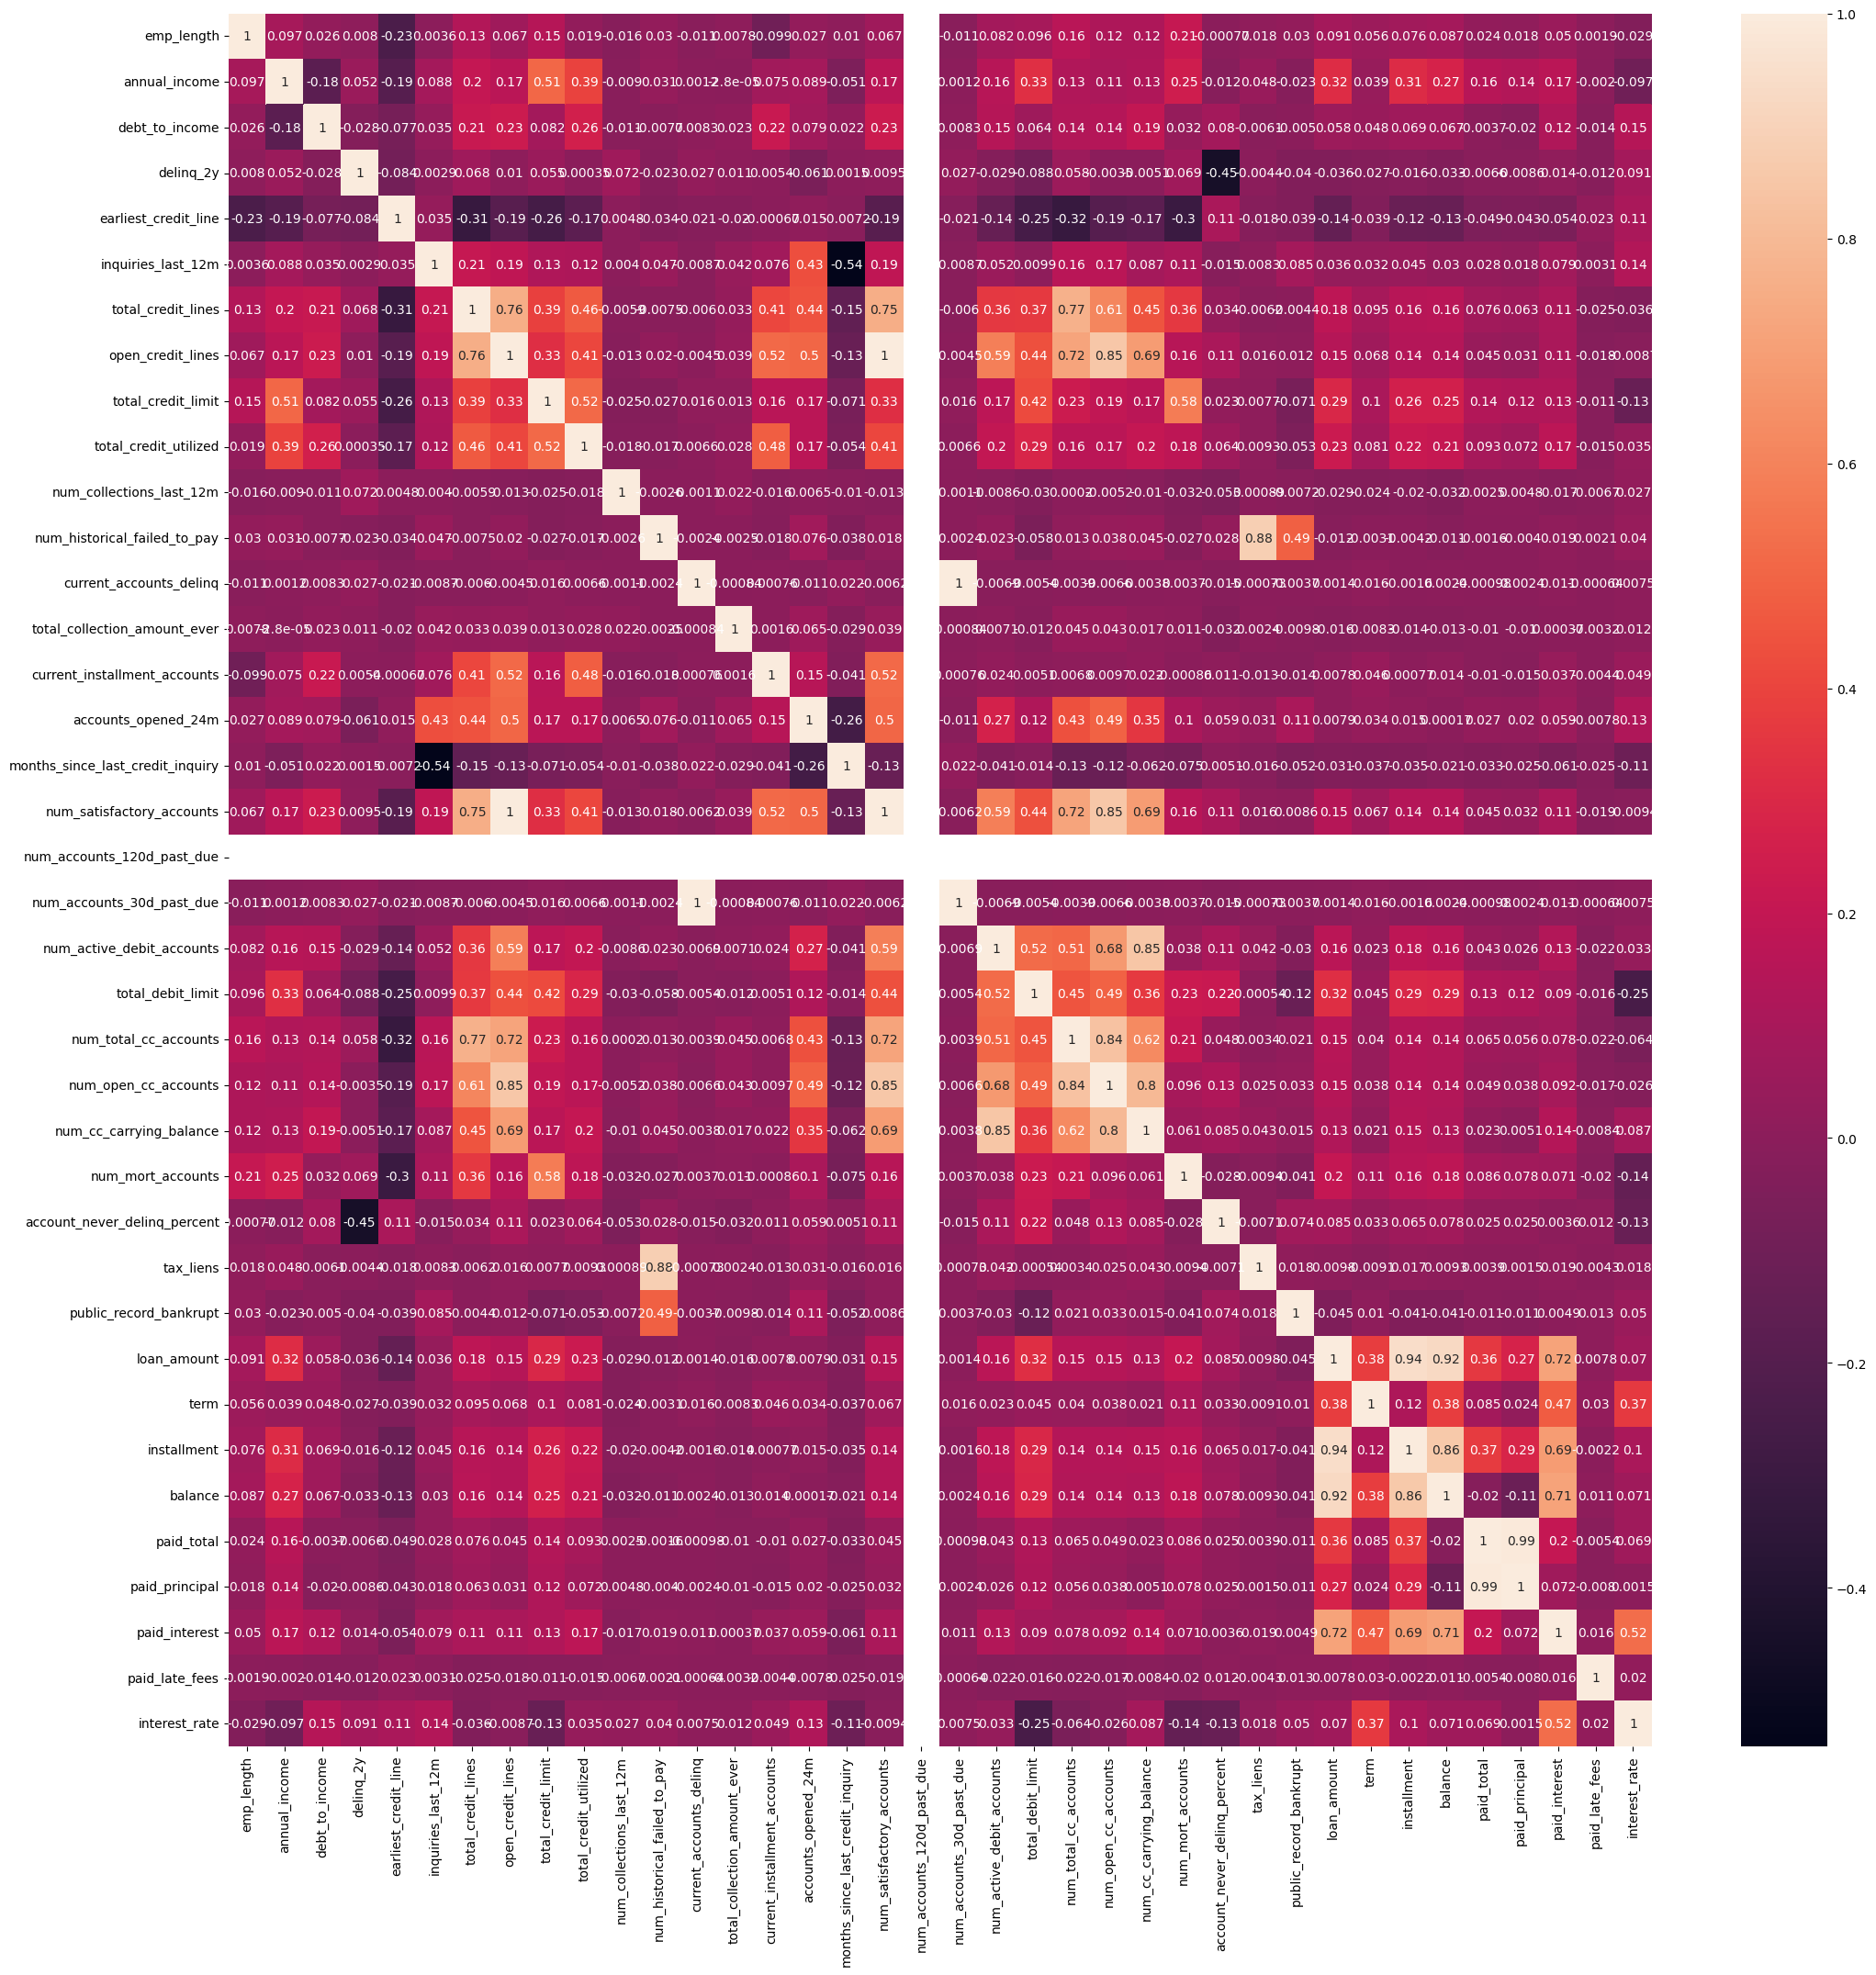

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(25, 25), dpi=100)
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [48]:
# months_since_last_credit_inquiry 8045 has values, fill remaning with mean
# num_accounts_120d_past_due 8872 has values, fill remaining with mean
df['months_since_last_credit_inquiry'].fillna(value=int(df['months_since_last_credit_inquiry'].mean()), inplace=True)
df['num_accounts_120d_past_due'].fillna(value=int(df['num_accounts_120d_past_due'].mean()), inplace=True)

In [49]:
#handling category variables.

from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df['emp_title']= label_encoder.fit_transform(df['emp_title']) 

df['state']= label_encoder.fit_transform(df['state']) 
df['loan_purpose']= label_encoder.fit_transform(df['loan_purpose']) 
df['grade']= label_encoder.fit_transform(df['grade']) 
df['sub_grade']= label_encoder.fit_transform(df['sub_grade']) 

one_hot_encoded_data = pd.get_dummies(df, columns = ['homeownership','verified_income','application_type','loan_status','initial_listing_status','disbursement_method','issue_months'])



In [50]:
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler 
#considering all columns for linear regression
X = one_hot_encoded_data.loc[:,~one_hot_encoded_data.columns.isin(['interest_rate'])]
scaler = MinMaxScaler().fit(X.values)
X = scaler.transform(X.values)
y = one_hot_encoded_data['interest_rate']
train_x, test_x, train_y, test_y = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=42)
# Initialise and fit model
lm = LinearRegression()
model = lm.fit(train_x, train_y)
y_pred = model.predict(test_x)
print(metrics.mean_squared_error(test_y,y_pred))
print(model.score(train_x,train_y))

0.34151992433770534
0.9883750058308163


In [51]:
from sklearn.metrics import r2_score
#selecting features with high r2 square and all one hot encoded data

for cols in one_hot_encoded_data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns : 
    
    #print( ' with ' + str( cols) + ' r squared is ' + str(  r2_score(  df[cols] , df['interest_rate']  )  )  )
    
    if (  -1.0  <= r2_score(  one_hot_encoded_data[cols] , one_hot_encoded_data['interest_rate']) <= -0.40  )  : 
        
        print( ' with ' + str( cols) + ' r squared is ' + str(  r2_score(  one_hot_encoded_data[cols] , one_hot_encoded_data['interest_rate']  )  )  )
    
    elif (    0.40  <= r2_score(  one_hot_encoded_data[cols] , one_hot_encoded_data['interest_rate']) <= 1.0  )   :  
        print( ' with ' + str( cols) + ' r squared is ' + str(  r2_score(  one_hot_encoded_data[cols] , one_hot_encoded_data['interest_rate']  )  )  )






 with state r squared is -0.5824840787793504
 with total_credit_lines r squared is -0.9744107810420859
 with open_credit_lines r squared is -0.7609641860012972
 with total_credit_limit r squared is -0.9814945506790422
 with total_credit_utilized r squared is -0.936937063603636
 with num_satisfactory_accounts r squared is -0.7656690402816657
 with num_total_cc_accounts r squared is -0.499472471902201
 with sub_grade r squared is 0.6541968005778498
 with interest_rate r squared is 1.0


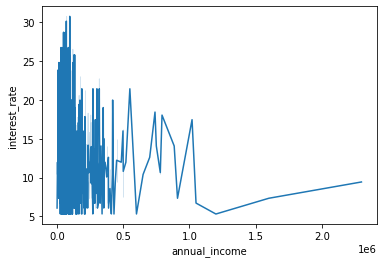

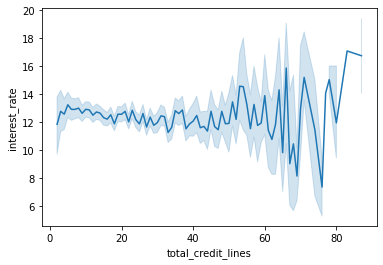

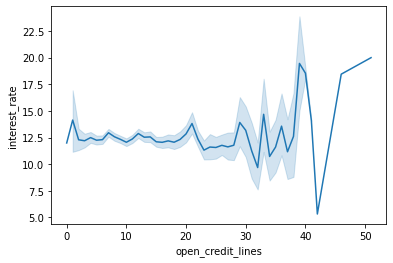

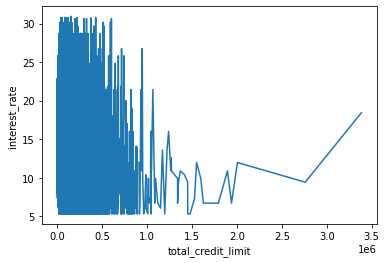

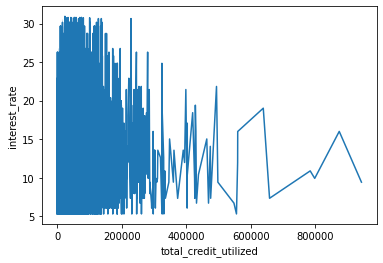

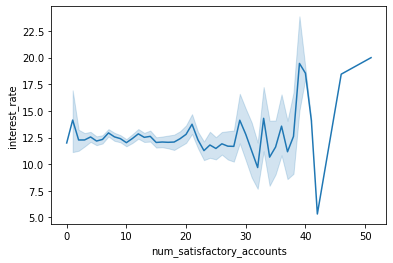

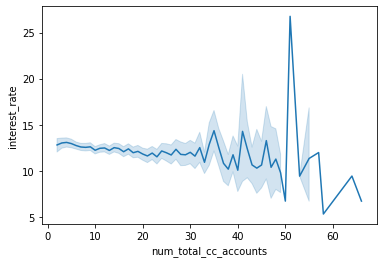

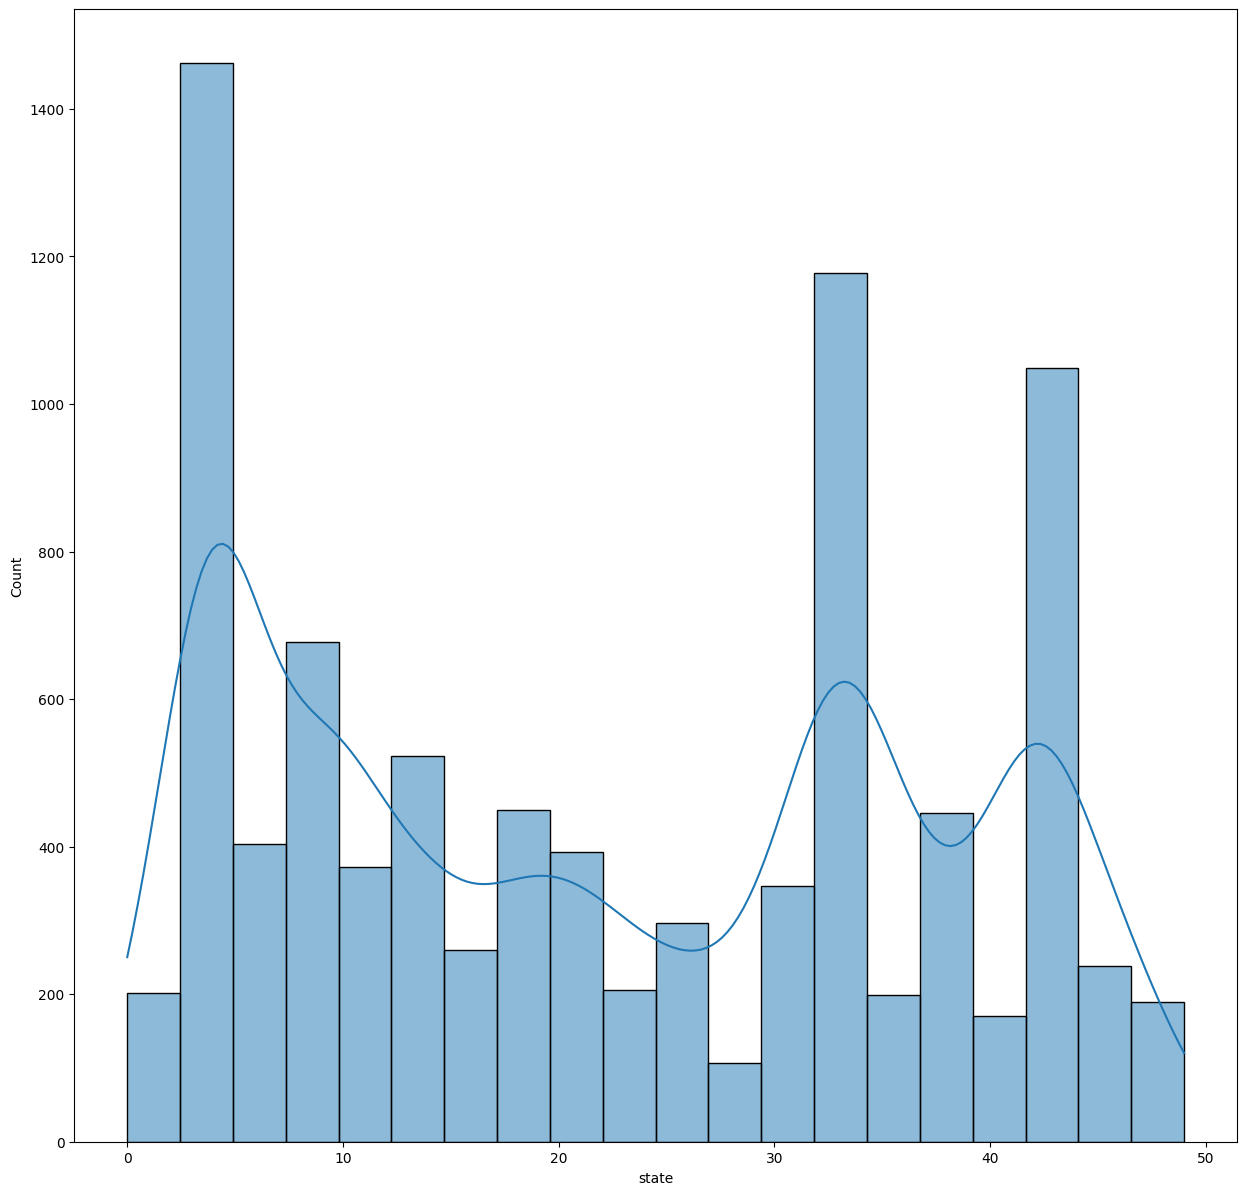

In [52]:
#Visualizations

sns.lineplot(data=one_hot_encoded_data, x='annual_income', y='interest_rate')
plt.show()
sns.lineplot(data=one_hot_encoded_data, x='total_credit_lines', y='interest_rate')
plt.show()
sns.lineplot(data=one_hot_encoded_data, x='open_credit_lines', y='interest_rate')
plt.show()
sns.lineplot(data=one_hot_encoded_data, x='total_credit_limit', y='interest_rate')
plt.show()
sns.lineplot(data=one_hot_encoded_data, x='total_credit_utilized', y='interest_rate')
plt.show()
sns.lineplot(data=one_hot_encoded_data, x='num_satisfactory_accounts', y='interest_rate')
plt.show()
sns.lineplot(data=one_hot_encoded_data, x='num_total_cc_accounts', y='interest_rate')
plt.show()
figure(figsize=(15, 15), dpi=100)
sns.histplot(df, x="state", bins=20, kde=True)
plt.show()
# OBSERVATIONS
# open credit lines and number of satisfactory accounts are same and one of them can be removed from features
# for lower annual incomes, credit limits and credit utilized interest rates are high
# Dataset is imbalanced for state. Very high data is for states like NJ, NY, TX, FL and very loweer for SD, DC, NE and others. For predictions of lower count of states may be affected.

Mean Absolute Error: 1.1150561874542772e-13
Mean Squared Error: 1.2460585339007213e-26
Root Mean Squared Error: 1.1162699198225854e-13


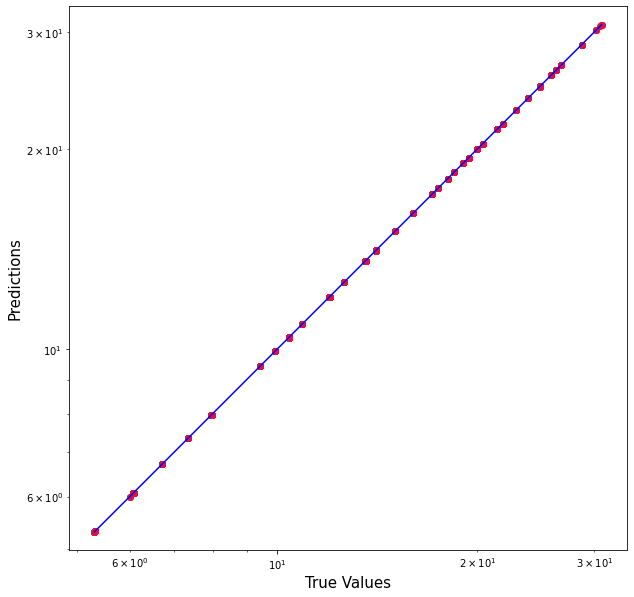

In [53]:
from sklearn.preprocessing import MinMaxScaler 

X= one_hot_encoded_data[[
'total_credit_lines',
'total_credit_limit',
'total_credit_utilized',
'num_satisfactory_accounts',
'num_total_cc_accounts',
'sub_grade',
'interest_rate',
'homeownership_MORTGAGE',
'homeownership_OWN',
'homeownership_RENT',
'verified_income_Not Verified',
'verified_income_Source Verified',
'verified_income_Verified',
'application_type_individual',
'application_type_joint',
'loan_status_Charged Off',
'loan_status_Current',
'loan_status_Fully Paid',
'loan_status_In Grace Period',
'loan_status_Late (16-30 days)',
'loan_status_Late (31-120 days)',
'initial_listing_status_fractional',
'initial_listing_status_whole',
'disbursement_method_Cash',
'disbursement_method_DirectPay',
'issue_months_Feb',
'issue_months_Jan',
'issue_months_Mar']]


# Normalizing values
scaler = MinMaxScaler().fit(X.values)
X = scaler.transform(X.values)

train_x, test_x, train_y, test_y = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=42)
# Initialise and fit model
lm = LinearRegression()
model = lm.fit(train_x, train_y)
y_pred = model.predict(test_x)
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))
plt.figure(figsize=(10,10))
plt.scatter(test_y, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(test_y))
p2 = min(min(y_pred), min(test_y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


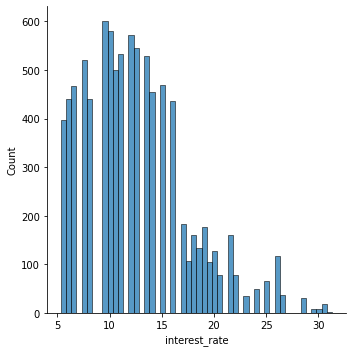

In [54]:
sns.displot(one_hot_encoded_data, x=one_hot_encoded_data['interest_rate'], binwidth=0.5) 
#shows interest rate is right skewed and most of the people get interest between 5 to 20%
# no one has ever got interest less than 5  and very few get more than 30

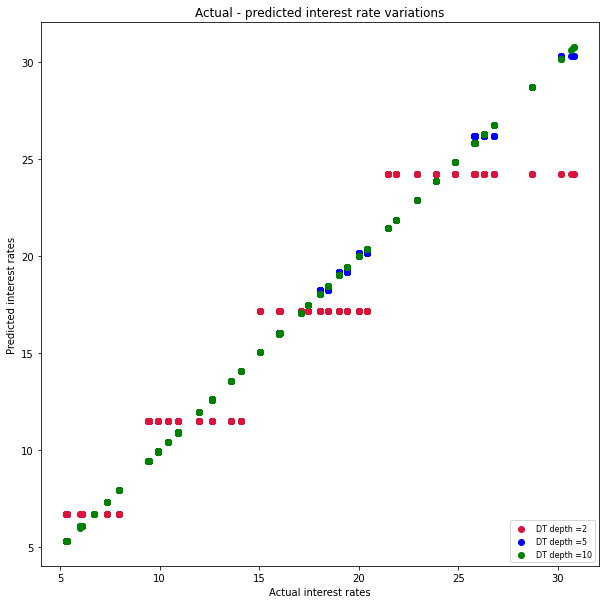

Mean Absolute Error for DT with depth 2: 1.3477410937370267
Mean Squared Error for DT with depth 2: 2.5320873280535294
Root Mean Squared Error for DT with depth 2: 1.5912533827312134
Mean Absolute Error for DT with depth 5: 0.025394766022044057
Mean Squared Error for DT with depth 5: 0.005719046769095787
Root Mean Squared Error for DT with depth 5: 0.07562437946255021
Mean Absolute Error for DT with depth 10: 3.8167938954035524e-05
Mean Squared Error for DT with depth 10: 2.6717557251922856e-06
Root Mean Squared Error for DT with depth 10: 0.0016345506187305076


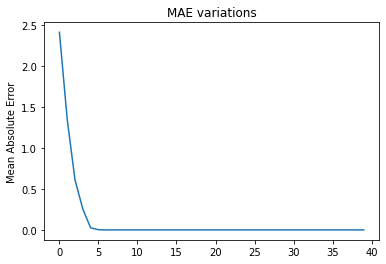

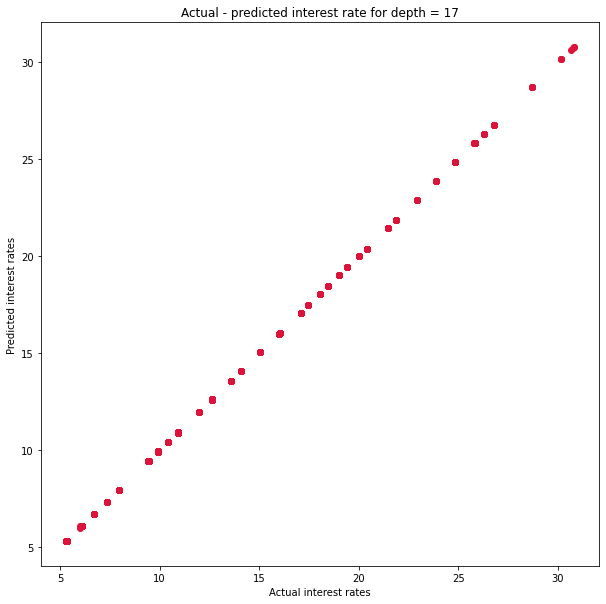

In [61]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor


# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=10)

regr_1.fit(train_x, train_y)
regr_2.fit(train_x, train_y)
regr_3.fit(train_x, train_y)

# Predict
y_pred1 = regr_1.predict(test_x)
y_pred2 = regr_2.predict(test_x)
y_pred3 = regr_3.predict(test_x)

# Plot the results
plt.figure(figsize=(10,10))
d2 =plt.scatter(test_y, y_pred1, c='crimson')
d5 =plt.scatter(test_y, y_pred2, c='blue')
d10 =plt.scatter(test_y, y_pred3, c='green')

plt.legend((d2, d5, d10),
           ('DT depth =2', 'DT depth =5', 'DT depth =10'),
           scatterpoints=1,
           loc='lower right',
           ncol=1,
           fontsize=8)
plt.xlabel('Actual interest rates')
plt.ylabel('Predicted interest rates')
plt.title('Actual - predicted interest rate variations')
plt.show()

print('Mean Absolute Error for DT with depth 2:', metrics.mean_absolute_error(test_y, y_pred1))
print('Mean Squared Error for DT with depth 2:', metrics.mean_squared_error(test_y, y_pred1))
print('Root Mean Squared Error for DT with depth 2:', np.sqrt(metrics.mean_squared_error(test_y, y_pred1)))

print('Mean Absolute Error for DT with depth 5:', metrics.mean_absolute_error(test_y, y_pred2))
print('Mean Squared Error for DT with depth 5:', metrics.mean_squared_error(test_y, y_pred2))
print('Root Mean Squared Error for DT with depth 5:', np.sqrt(metrics.mean_squared_error(test_y, y_pred2)))

print('Mean Absolute Error for DT with depth 10:', metrics.mean_absolute_error(test_y, y_pred3))
print('Mean Squared Error for DT with depth 10:', metrics.mean_squared_error(test_y, y_pred3))
print('Root Mean Squared Error for DT with depth 10:', np.sqrt(metrics.mean_squared_error(test_y, y_pred3)))


#With higher values of depth, error reduces for decision tree
mae=[]
for i in range(40):
  regr = DecisionTreeRegressor(max_depth=i+1)
  regr.fit(train_x, train_y)
  y_pred = regr.predict(test_x)
  mae.append(metrics.mean_absolute_error(test_y, y_pred))

plt.plot(mae)
plt.xlabel('')
plt.ylabel('Mean Absolute Error')
plt.title('MAE variations')
plt.show()

# We observe that MAE of e^-14 is stable after depth =17 hence we select depth =17
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=17)

regr_1.fit(train_x, train_y)

# Predict
y_pred1 = regr_1.predict(test_x)

# Plot the results
plt.figure(figsize=(10,10))
plt.scatter(test_y, y_pred1, c='crimson')
plt.xlabel('Actual interest rates')
plt.ylabel('Predicted interest rates')
plt.title('Actual - predicted interest rate for depth = 17')
plt.show()

